## Name : Sidhantha Poddar
### Reg  : 17BCE2044

# Problem Statement

Considering the diabetes dataset, consisting of 10 attributes followed by the target,create 3 Models. 


Model 1 consists of attributes (age,bmi,bp). 
Model 2 consists of attributes (age,bmi,bp,sex). 
Model 3 consists of remaining 6 attributes. 

For all three Models, finally suggest which is the best Model.

Calculate mae, mse, rms and r-squared values. r-squared value will be b/w 0 to 1. 1 is best fit and 0 is worst fit.

### after looping over all the possible 1024 combination best fit model is found

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
import sklearn
import statsmodels.api as sm
%matplotlib inline

In [2]:
dataset= sklearn.datasets.load_diabetes(return_X_y=False)

In [3]:
diabetes=dataset

In [4]:
data=pd.DataFrame(data=np.c_[diabetes['data'],diabetes['target']]
                   ,columns=diabetes['feature_names'] + ['target'])

In [5]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# plotting data for analysis

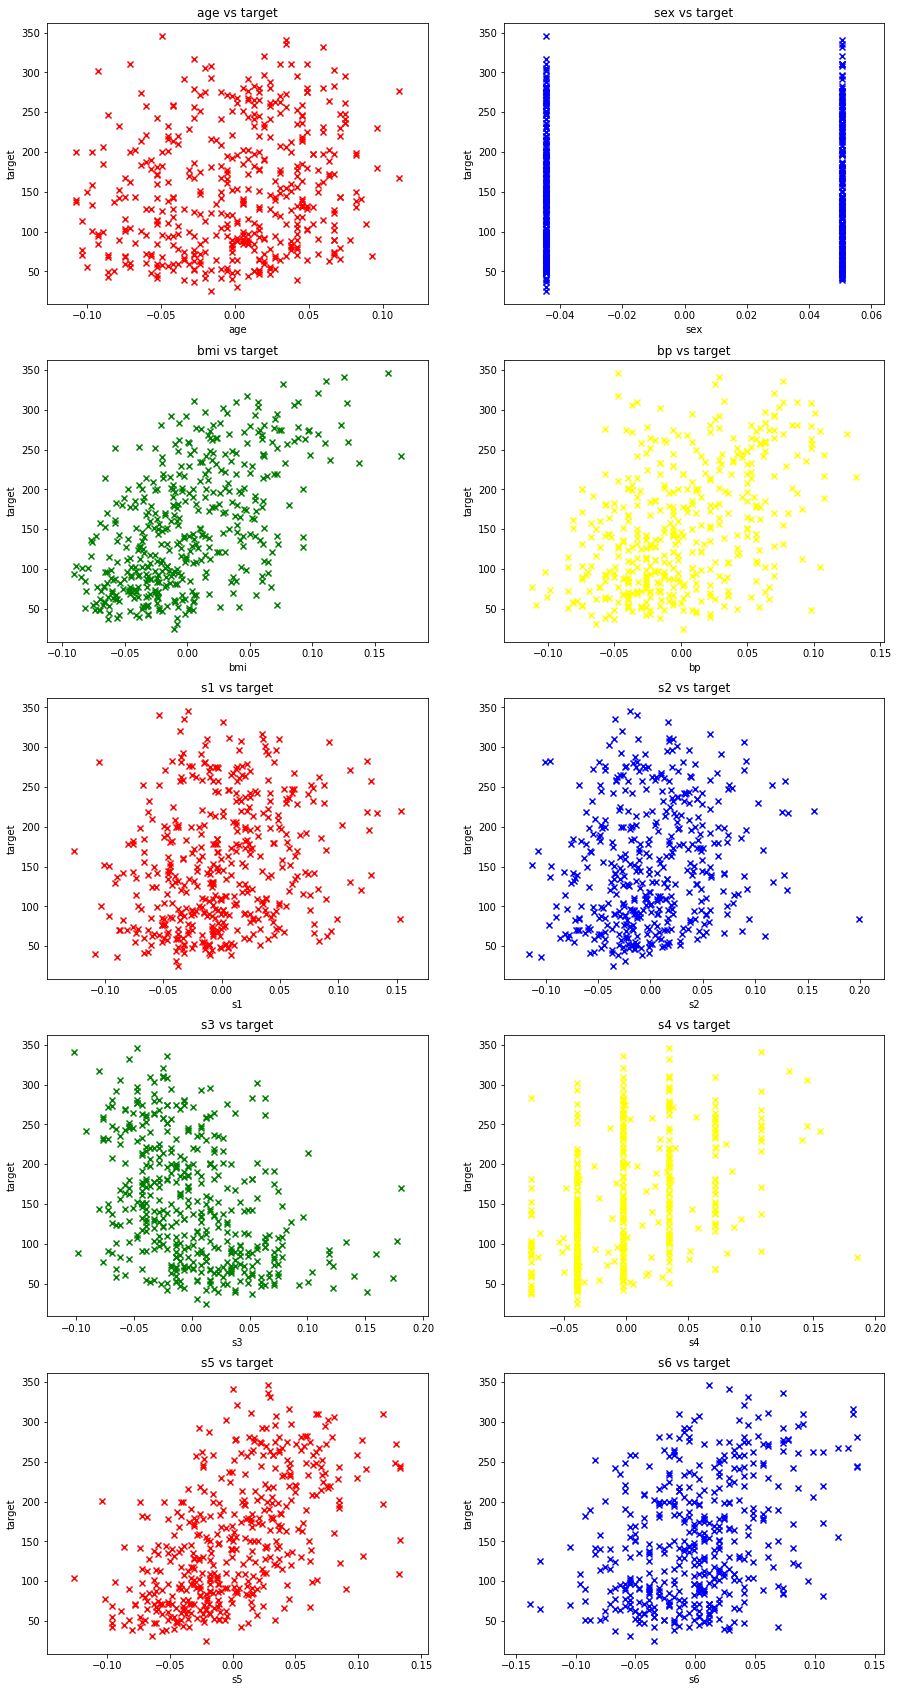

In [6]:
features=diabetes['feature_names']
plt.figure(figsize=(15,30))
for i in range(10):
    plt.subplot(5,2,i+1)
    
    f=features[i]
    #data.plot(x=f, y='target', style='o')
    plt.scatter(data[f].values,data['target'].values,marker="x",
                color=list('red blue green yellow'.split(' '))[i%4])
    plt.title(f+' vs target')
    plt.xlabel(f)
    plt.ylabel('target')
plt.show()


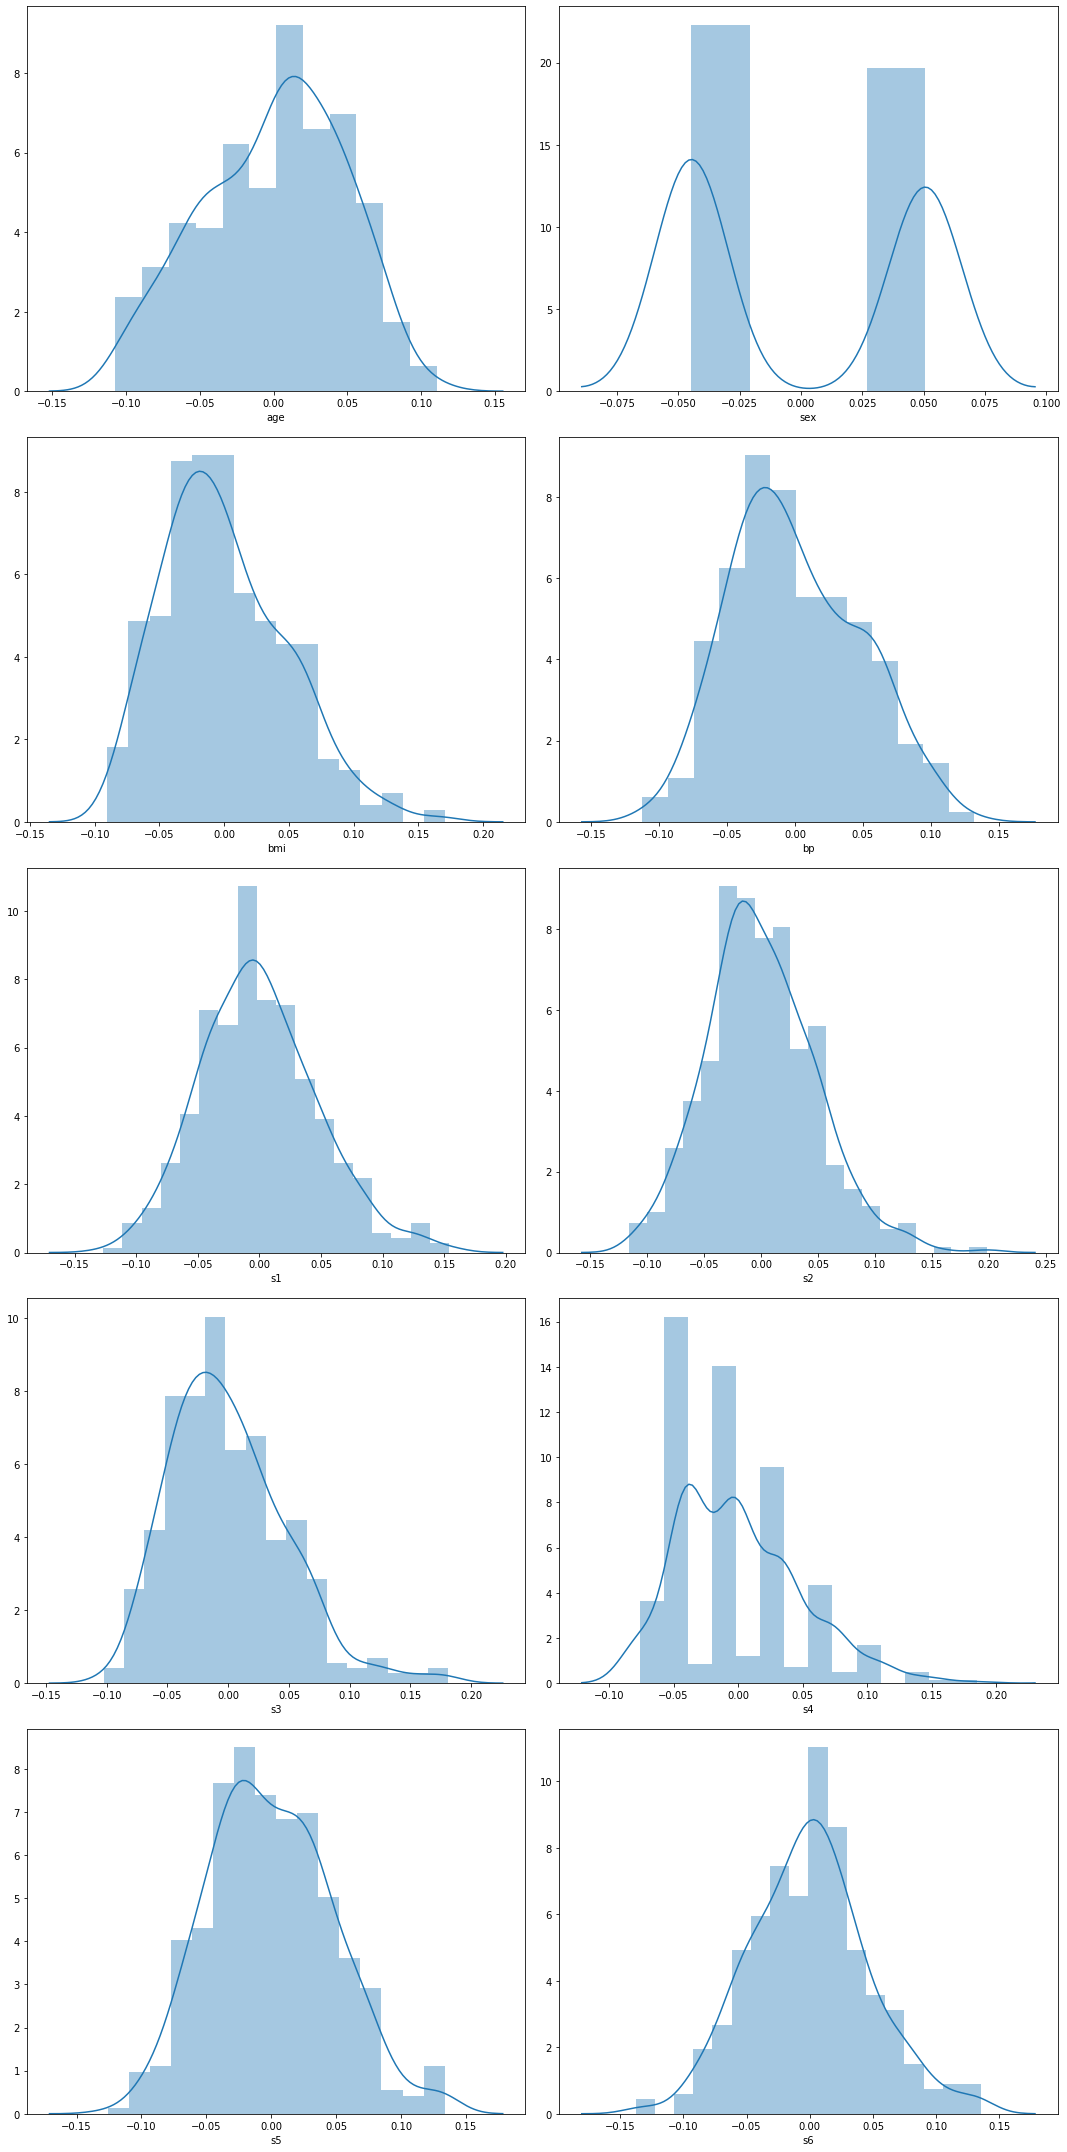

In [7]:
features=diabetes['feature_names']
plt.figure(figsize=(15,30))
for i in range(10):
    plt.subplot(5,2,i+1)
    f=features[i]
    plt.tight_layout()
    seabornInstance.distplot(data[f])

# MODEL 1 

in this model we are using the following

- age
- bmi
- blood preassure

### model made using statsmodels

In [9]:
X = data[["age","bmi","bp"]]
y = data["target"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              12.87
Date:                Sat, 04 Jan 2020   Prob (F-statistic):                    4.53e-08
Time:                        15:29:28   Log-Likelihood:                         -2879.9
No. Observations:                 442   AIC:                                      5766.
Df Residuals:                     439   BIC:                                      5778.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           25.9909    174.444      0.149      0.882    -316.857     368.839
bmi          788.7806    178.919      4.409      0.000     437.137    1140.425
bp           394.1276    186.640      2.112      0.035      27.308     760.947
==============================================================================
Omnibus:                       12.587   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.934
Skew:                           0.175   Prob(JB):                       0.0189
Kurtosis:                       2.444   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model using sklearn Linear regression

In [10]:
X = data[["age","bmi","bp"]]
y = data["target"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

print("R squared ",lm.score(X,y))
print("coefficients",lm.coef_)
print("intercept",lm.intercept_)


R squared  0.3962220406059186
coefficients [ 25.99093614 788.78062759 394.1276443 ]
intercept 152.13348416289654


# MODEL 2 

in this model we are using the following

- age
- bmi
- blood preassure
- sex

### model made using statsmodels

In [11]:
X = data[["age","bmi","bp","sex"]]
y = data["target"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.073
Method:                 Least Squares   F-statistic:                              9.734
Date:                Sat, 04 Jan 2020   Prob (F-statistic):                    1.50e-07
Time:                        15:29:29   Log-Likelihood:                         -2879.7
No. Observations:                 442   AIC:                                      5767.
Df Residuals:                     438   BIC:                                      5784.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           37.2412    175.485      0.212      0.832    -307.655     382.138
bmi          787.1793    179.061      4.396      0.000     435.254    1139.105
bp           416.6738    190.202      2.191      0.029      42.852     790.495
sex         -106.5775    170.032     -0.627      0.531    -440.757     227.602
==============================================================================
Omnibus:                        9.858   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.464
Skew:                           0.146   Prob(JB):                       0.0395
Kurtosis:                       2.485   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model made using sklearn

In [12]:
X = data[["age","bmi","bp","sex"]]
y = data["target"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

print("R squared ",lm.score(X,y))
print("coefficients",lm.coef_)
print("intercept",lm.intercept_)

R squared  0.40026108237713987
coefficients [  37.24121082  787.17931333  416.67377167 -106.57751991]
intercept 152.13348416289654


# MODEL 3

in this model we are using the following

- s1
- s2
- s3
- s4
- s5
- s6

### model made using statsmodels

In [13]:
X = data["s1 s2 s3 s4 s5 s6".split(' ')]
y = data["target"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.077
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              6.025
Date:                Sat, 04 Jan 2020   Prob (F-statistic):                    4.53e-06
Time:                        15:29:31   Log-Likelihood:                         -2880.9
No. Observations:                 442   AIC:                                      5774.
Df Residuals:                     436   BIC:                                      5798.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s1          -898.0198   1265.051     -0.710      0.478   -3384.376    1588.337
s2           693.6114   1026.738      0.676      0.500   -1324.359    2711.582
s3            22.3020    645.506      0.035      0.972   -1246.387    1290.991
s4           -12.3704    488.022     -0.025      0.980    -971.538     946.798
s5          1070.7597    514.472      2.081      0.038      59.606    2081.914
s6           223.8739    190.226      1.177      0.240    -150.000     597.748
==============================================================================
Omnibus:                       10.939   Durbin-Watson:                   0.275
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.752
Skew:                           0.255   Prob(JB):                       0.0126
Kurtosis:                       2.535   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### model made using sklearn

In [14]:
X = data[["s1","s2","s3","s4","s5","s6"]]
y = data["target"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

print("R squared ",lm.score(X,y))
print("coefficients",lm.coef_)
print("intercept",lm.intercept_)

R squared  0.3753962455984339
coefficients [-898.01975258  693.6113817    22.3020424   -12.3704237  1070.75971723
  223.87386393]
intercept 152.13348416289628


# Best  Attribute combination which gives best R2 values 
### In this code we are trying all 2^10 combination

In [15]:
2**10

1024

In [16]:
val=["age","bmi","sex","bp","s1","s2","s3","s4","s5","s6"]

In [21]:
br2=0
bsel=[]
for i in range(1,1024):
    
    t=i
    m=[]
    for j in range(10):
        if t%2==1:
            m+=[val[j]]
        t=int(t/2)
        if t==0:
            break
            
    #print(m)
    X = data[m]


    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    cr2=lm.score(X,y)
    
    valx+=[cr2]
    
    if(br2<cr2):
        br2=cr2
        bsel=m

In [22]:
print("best R2 value --->",br2)

best R2 value ---> 0.5177494254132934


# Best Combination

In [23]:
print("best combination")
bsel

best combination


['age', 'bmi', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [20]:
valx=[]

# Best R2 value 

In [24]:
max(valx)

0.5177494254132934

In [25]:
print("all values of possible  R2")
valx

all values of possible  R2


[0.03530218264671636,
 0.3439237602253803,
 0.3504428396718997,
 0.0018543357106460825,
 0.03541411156040586,
 0.34399899920943333,
 0.3509243728489838,
 0.19490798886682947,
 0.19669313874600158,
 0.39599414313715675,
 0.3962220406059186,
 0.19916755141768516,
 0.2015819410292773,
 0.399798087566281,
 0.40026108237714,
 0.04495353245556555,
 0.06385439378443403,
 0.34850514122150056,
 0.3530278195043869,
 0.04622122575169485,
 0.0640066812419462,
 0.34859740092642366,
 0.35345903237022225,
 0.2066163038828971,
 0.20707881362501956,
 0.39696922397726697,
 0.3970573116646038,
 0.21053788457974068,
 0.2113485030177078,
 0.40068498322125345,
 0.4009443972624717,
 0.030294651136685502,
 0.05384535838690696,
 0.3443921179908822,
 0.35049486935006413,
 0.030634089590864888,
 0.05386352693287044,
 0.34452333890937836,
 0.35101302723621564,
 0.2036991365954356,
 0.2044139634556632,
 0.39599435974424924,
 0.39622599239844714,
 0.20936770605053667,
 0.21047828217374673,
 0.3998482885548844,
 0.4